## Import Libraries & Load Dataset

In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Tesla Dataset

In [2]:
data = pd.read_csv("Tesla.csv - Tesla.csv.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
data = data[["Date","Close"]]
data["Date"] = pd.to_datetime(data["Date"])
data.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


<AxesSubplot:xlabel='Date', ylabel='Price'>

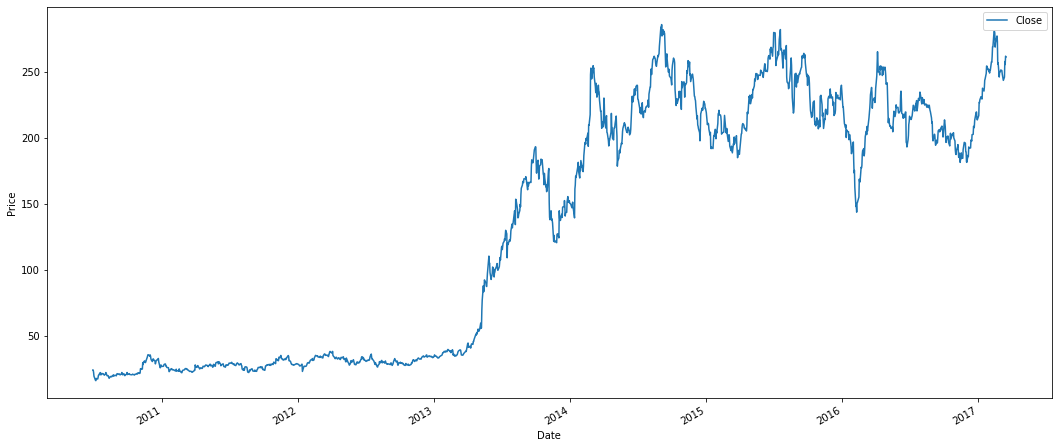

In [4]:
data.set_index("Date").plot(figsize=(18,8),xlabel="Date",ylabel="Price")

# Preprocessing

In [5]:
X = data[["Close"]]
Train , Test = X[:1500],X[1500:]

## Scaling
### StandardScaler

In [6]:
scale = StandardScaler()
Train = scale.fit_transform(Train)
Test = scale.transform(Test)
with open("StandardScaler","wb") as f:
    pickle.dump(scale,f)

In [7]:
def convertSignalToDataset(signal,step):
    X,Y = [],[]
    for i in range(len(signal)-step):
        j = i+step
        X.append(signal[i:j])
        Y.append(signal[j])
        
    X,Y = np.array(X), np.array(Y)
    return torch.Tensor(X), torch.Tensor(Y)

In [8]:
X_train, Y_train = convertSignalToDataset(Train,10)
X_test , Y_test = convertSignalToDataset(Test,10)

# Model
## Recurrent Neural Network

## LSTM

In [10]:
class RNN(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers,num_classes):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True)
        self.fc = nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        h_0 = torch.zeros(self.num_layers,x.size(0),self.hidden_size)
        c_0 = torch.zeros(self.num_layers,x.size(0),self.hidden_size)
        
        x,_ = self.lstm(x, (h_0, c_0))
        x = x[:,-1,:]
        x = self.fc(x)
        
        return x

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNN(input_size=1,hidden_size=64,num_layers=1,num_classes=1).to(device)

In [12]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
loss_function = nn.MSELoss()

In [13]:
for epoch in range(250):
    model.train()
    optimizer.zero_grad()
    predict = model(X_train)
    loss = loss_function(predict,Y_train)
    loss.backward()
    optimizer.step()
    print(f"Epochs: {epoch+1}, Loss: {loss}")

Epochs: 1, Loss: 0.9488527774810791
Epochs: 2, Loss: 0.9307845830917358
Epochs: 3, Loss: 0.9125509858131409
Epochs: 4, Loss: 0.8940516710281372
Epochs: 5, Loss: 0.8751910328865051
Epochs: 6, Loss: 0.8558601140975952
Epochs: 7, Loss: 0.8359386324882507
Epochs: 8, Loss: 0.8152927160263062
Epochs: 9, Loss: 0.7937691807746887
Epochs: 10, Loss: 0.7711926102638245
Epochs: 11, Loss: 0.7473669052124023
Epochs: 12, Loss: 0.7220790982246399
Epochs: 13, Loss: 0.6951044201850891
Epochs: 14, Loss: 0.6662111282348633
Epochs: 15, Loss: 0.6351688504219055
Epochs: 16, Loss: 0.6017632484436035
Epochs: 17, Loss: 0.5658213496208191
Epochs: 18, Loss: 0.5272530317306519
Epochs: 19, Loss: 0.48611360788345337
Epochs: 20, Loss: 0.4426928758621216
Epochs: 21, Loss: 0.3976261019706726
Epochs: 22, Loss: 0.352018266916275
Epochs: 23, Loss: 0.30757302045822144
Epochs: 24, Loss: 0.2666287124156952
Epochs: 25, Loss: 0.23184746503829956
Epochs: 26, Loss: 0.20517565310001373
Epochs: 27, Loss: 0.1858832985162735
Epochs:

Epochs: 212, Loss: 0.007277847267687321
Epochs: 213, Loss: 0.007260942365974188
Epochs: 214, Loss: 0.007244125474244356
Epochs: 215, Loss: 0.0072273933328688145
Epochs: 216, Loss: 0.007210747338831425
Epochs: 217, Loss: 0.0071941870264709
Epochs: 218, Loss: 0.007177712395787239
Epochs: 219, Loss: 0.007161321584135294
Epochs: 220, Loss: 0.0071450150571763515
Epochs: 221, Loss: 0.007128790952265263
Epochs: 222, Loss: 0.007112650200724602
Epochs: 223, Loss: 0.007096593268215656
Epochs: 224, Loss: 0.00708061782643199
Epochs: 225, Loss: 0.007064723409712315
Epochs: 226, Loss: 0.007048910483717918
Epochs: 227, Loss: 0.007033178582787514
Epochs: 228, Loss: 0.007017527241259813
Epochs: 229, Loss: 0.007001955062150955
Epochs: 230, Loss: 0.006986462511122227
Epochs: 231, Loss: 0.006971049588173628
Epochs: 232, Loss: 0.006955713964998722
Epochs: 233, Loss: 0.006940457504242659
Epochs: 234, Loss: 0.006925278343260288
Epochs: 235, Loss: 0.006910175085067749
Epochs: 236, Loss: 0.006895147729665041
E

# Predict

In [14]:
model.eval()
pred_train = model(X_train)
pred_train = pred_train.data.numpy()
pred_test = model(X_test)
pred_test = pred_test.data.numpy()
pred_train = scale.inverse_transform(pred_train)
pred_test = scale.inverse_transform(pred_test)
nan_data = np.ones((1500,1)) * np.nan
pred_test = np.concatenate((nan_data,pred_test),axis=0)

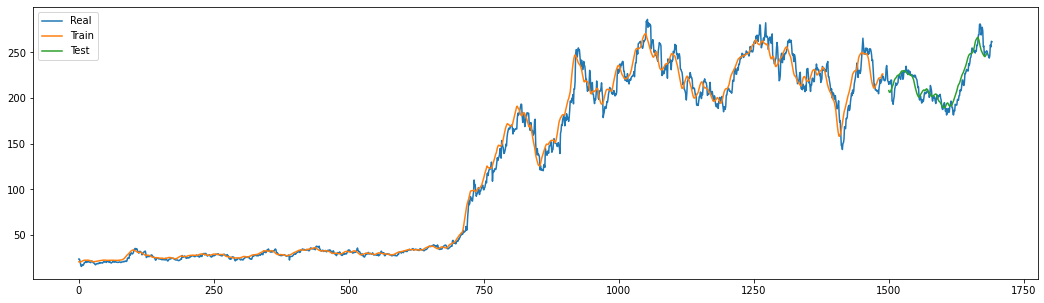

In [15]:
plt.figure(figsize=(18,5))
plt.plot(X,label="Real")
plt.plot(pred_train,label="Train")
plt.plot(pred_test,label="Test")
plt.legend()
plt.show()